In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

# Função para imprimir métricas de avaliação
def print_metrics(y_test, y_pred, training_time, classifier_name):
    print(f"Métricas para {classifier_name}:")
    print(f"Tempo de Treinamento: {training_time:.2f} segundos")
    print("Acurácia:", accuracy_score(y_test, y_pred))
    print("Precisão:", precision_score(y_test, y_pred, average='macro'))
    print("Recall:", recall_score(y_test, y_pred, average='macro'))
    print("F1-Score:", f1_score(y_test, y_pred, average='macro'))

    # Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_test)), yticklabels=sorted(set(y_test)))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    print("\n")

# Carregar o novo dataset "Obesity Risk Dataset"
df = pd.read_csv('/workspaces/codespaces-jupyter/data/obesity_level.csv')

Quantidade de Atributos: 18
Quantidade de Instâncias: 20758
                                   Tipo  Valores Faltando  \
id                                int64                 0   
Gender                           object                 0   
Age                             float64                 0   
Height                          float64                 0   
Weight                          float64                 0   
family_history_with_overweight    int64                 0   
FAVC                              int64                 0   
FCVC                            float64                 0   
NCP                             float64                 0   
CAEC                             object                 0   
SMOKE                             int64                 0   
CH2O                            float64                 0   
SCC                               int64                 0   
FAF                             float64                 0   
TUE                      

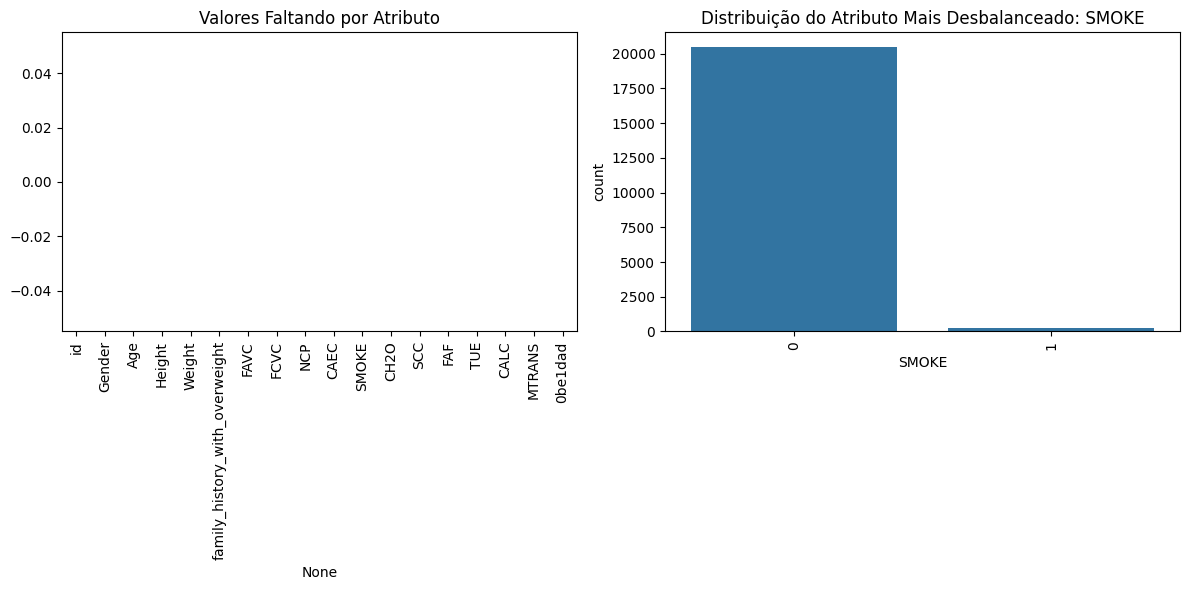

In [2]:
# a. Quantidade de atributos do dataset
num_attributes = df.shape[1]

# b. Tipo de cada atributo
attribute_types = df.dtypes

# c. Intervalo ou conjunto de valores de cada atributo
attribute_ranges = df.describe(include='all').T

# d. Quais e quantos atributos possuem valores faltando
missing_values = df.isnull().sum()

# e. Qual atributo é o mais desbalanceado do dataset
balance_info = df.apply(lambda x: x.value_counts(normalize=True).values[0])
most_unbalanced_attribute = balance_info.idxmax()

# f. Quantas instâncias / exemplos o dataset possui
num_instances = df.shape[0]

# Apresentar os dados
summary_table = pd.DataFrame({
    'Tipo': attribute_types,
    'Valores Faltando': missing_values,
    'Valor Mais Frequente (%)': balance_info,
    'Mínimo': attribute_ranges['min'],
    'Máximo': attribute_ranges['max'],
    'Únicos': attribute_ranges['unique']
})

print(f"Quantidade de Atributos: {num_attributes}")
print(f"Quantidade de Instâncias: {num_instances}")
print(summary_table)

# Gráficos
plt.figure(figsize=(12, 6))

# Gráfico de valores faltando
plt.subplot(1, 2, 1)
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Valores Faltando por Atributo')

# Gráfico do atributo mais desbalanceado
plt.subplot(1, 2, 2)
sns.countplot(x=df[most_unbalanced_attribute])
plt.xticks(rotation=90)
plt.title(f'Distribuição do Atributo Mais Desbalanceado: {most_unbalanced_attribute}')

plt.tight_layout()
plt.show()

In [3]:
# Informações do dataset
print("Informações do Dataset:")
df.info()

Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC     

In [4]:
# Exclusão da column id atributo desnecessário
df.drop(columns=['id'] , inplace= True)
# Renomeado o atributo para melhor interpretação
df.rename(columns={"0be1dad":"obesity_level"},inplace=True)

In [5]:
# Contagem de valores para a variável obesity_level
obesity_counts = df['obesity_level'].value_counts()
print("\nContagem de Valores para a Variável 'obesity_level':")
print(obesity_counts)


Contagem de Valores para a Variável 'obesity_level':
obesity_level
Obesity_Type_III       4046
Obesity_Type_II        3248
0rmal_Weight           3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64


Métricas para DecisionTreeClassifier:
Tempo de Treinamento: 0.12 segundos
Acurácia: 0.8480250481695568
Precisão: 0.8329902896718558
Recall: 0.8328305742125713
F1-Score: 0.8328296503048261

Matriz de Confusão:


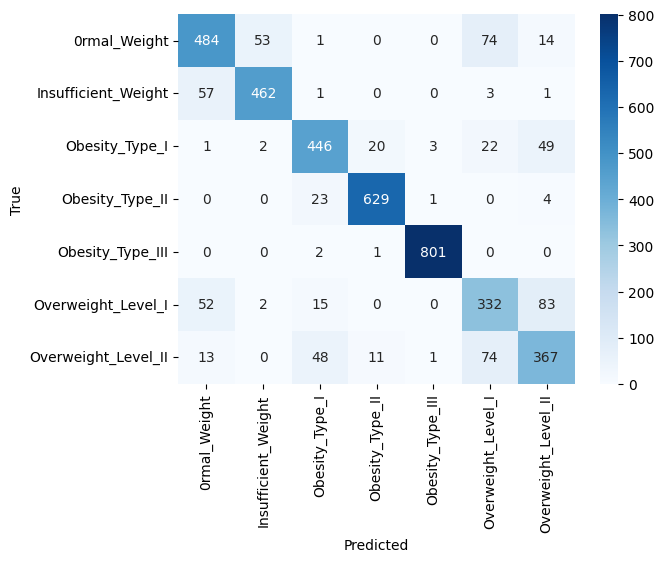

Métricas para SVC:
Tempo de Treinamento: 4.22 segundos
Acurácia: 0.7141136801541426
Precisão: 0.7113558256576853
Recall: 0.6937662496064586
F1-Score: 0.6908101361975346

Matriz de Confusão:


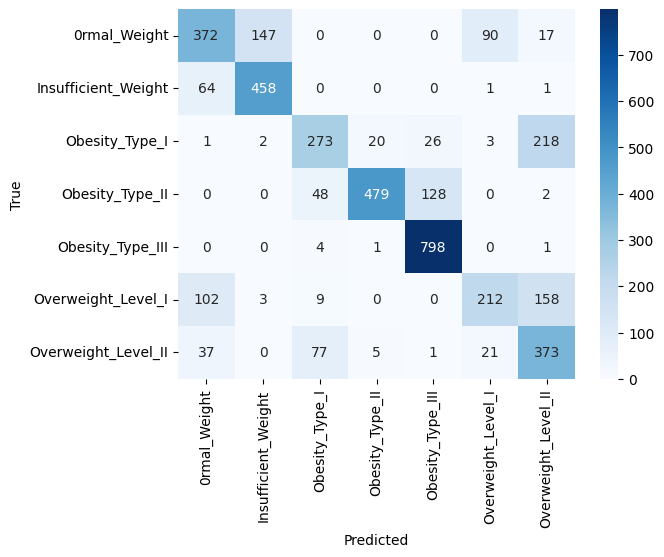



Métricas para RandomForestClassifier:
Tempo de Treinamento: 1.99 segundos
Acurácia: 0.8947495183044316
Precisão: 0.8845878281021317
Recall: 0.8822379038919481
F1-Score: 0.8831823603315022

Matriz de Confusão:


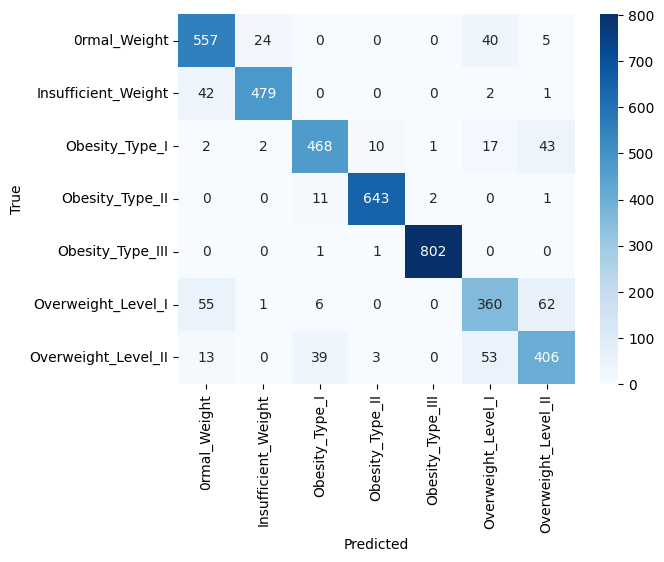



Métricas para KNeighborsClassifier:
Tempo de Treinamento: 0.03 segundos
Acurácia: 0.8362235067437379
Precisão: 0.8197848703926189
Recall: 0.8206138341464175
F1-Score: 0.819732426365071

Matriz de Confusão:


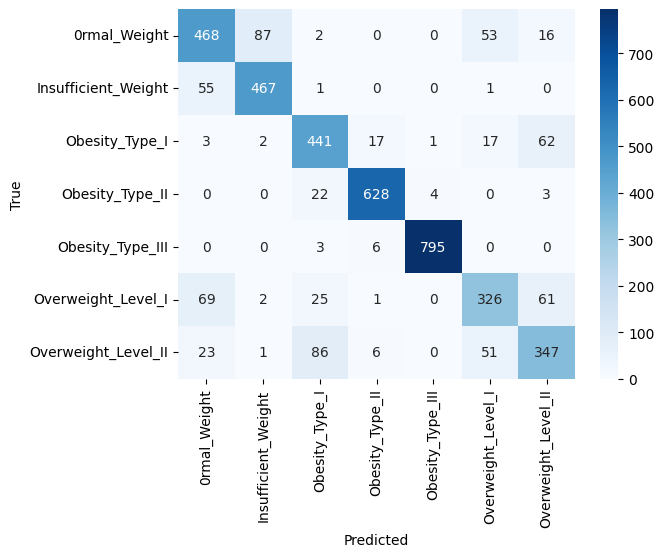

In [6]:

# Separar os dados em features (atributos) e target (rótulo)
X = df[['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 
        'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS']]
y = df['obesity_level']  # Rótulo de nível de obesidade

# Codificar variáveis categóricas
le = LabelEncoder()
X.loc[:, 'Gender'] = le.fit_transform(X['Gender'])
X.loc[:, 'family_history_with_overweight'] = le.fit_transform(X['family_history_with_overweight'])
X.loc[:, 'FAVC'] = le.fit_transform(X['FAVC'])
X.loc[:, 'CAEC'] = le.fit_transform(X['CAEC'])
X.loc[:, 'SMOKE'] = le.fit_transform(X['SMOKE'])
X.loc[:, 'SCC'] = le.fit_transform(X['SCC'])
X.loc[:, 'CALC'] = le.fit_transform(X['CALC'])
X.loc[:, 'MTRANS'] = le.fit_transform(X['MTRANS'])

# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar os modelos de classificação
dt_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC(random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)

# Função para treinar e avaliar um modelo
def train_and_evaluate_model(classifier, X_train, y_train, X_test, y_test):
    start_time = time.time()
    classifier.fit(X_train, y_train)
    training_time = time.time() - start_time
    y_pred = classifier.predict(X_test)
    print_metrics(y_test, y_pred, training_time, type(classifier).__name__)

# Treinar e avaliar o modelo de Árvore de Decisão
train_and_evaluate_model(dt_classifier, X_train, y_train, X_test, y_test)

# Treinar e avaliar o modelo SVM
train_and_evaluate_model(svm_classifier, X_train, y_train, X_test, y_test)

# Treinar e avaliar o modelo Random Forest
train_and_evaluate_model(rf_classifier, X_train, y_train, X_test, y_test)
